In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Python/3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 1. Load the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

img_size = X_train[0].shape

In [3]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('image size:', img_size)
print('classes:', len(class_names))

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
image size: (32, 32, 3)
classes: 10


50000 training samples and 10000 test samples. 10 classes.

Let's view an image.

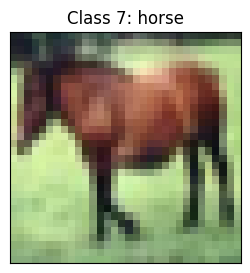

In [4]:
i = 7
example_x, example_y  = X_train[i], y_train[i]
                                            
plt.figure(figsize=(3,3))                        
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(example_x)
plt.title('Class {label}: {name}'.format(label=example_y[0], name=class_names[example_y[0]]));

# 2. Preprocessing Data

Normalize pixel values between 0 and 1.

In [5]:
# normalize 
X_train = X_train / 255
X_test = X_test / 255

Convert integer labels to one-hot encoded vectors.

In [6]:
# convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# 3. Build the Model

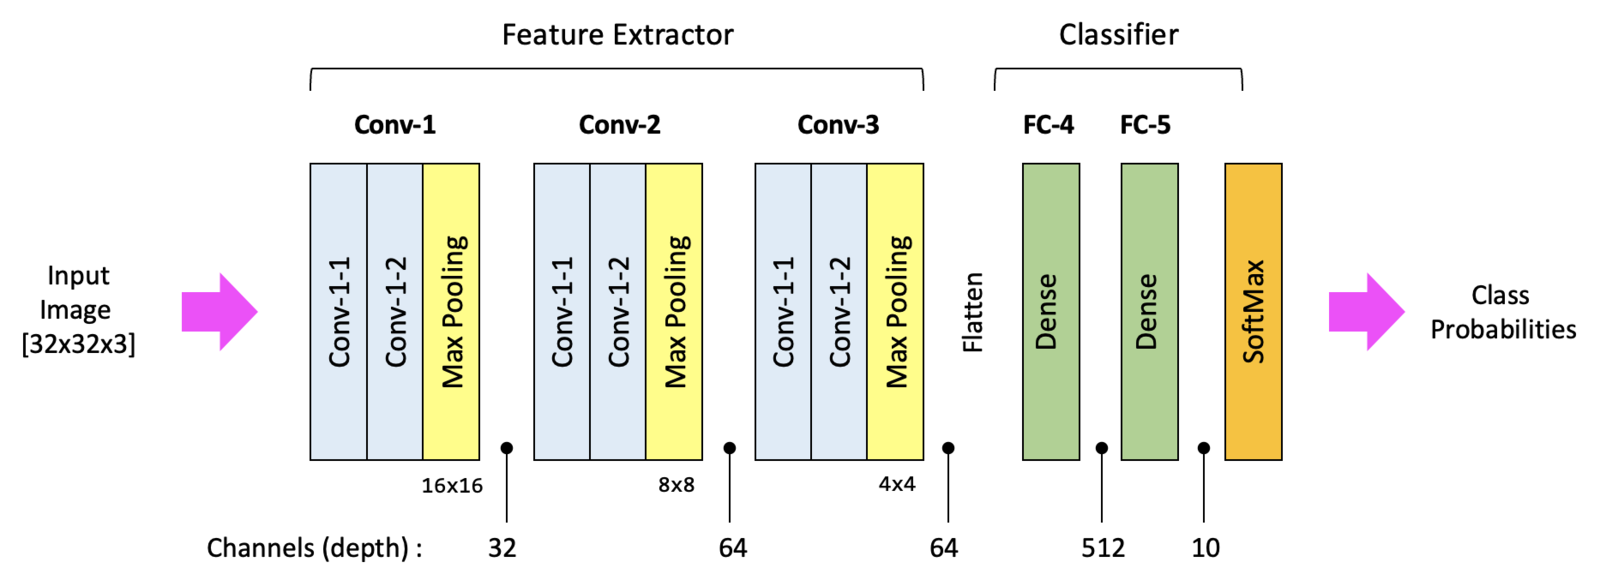

In [7]:
# build the model 
model = Sequential()

# Conv Block 1: 32 filters, max pooling 
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=img_size))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Block 2: 64 filters, max pooling 
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Block 3: 64 filters, max pooling 
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten the convolutional features
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

/Users/liusiqi/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# compile the model 
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
# train the model
history = model.fit(X_train, y_train_onehot, batch_size=256, epochs=31, validation_split=0.3)

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 271ms/step - accuracy: 0.1935 - loss: 2.2030 - val_accuracy: 0.3089 - val_loss: 1.8772
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 281ms/step - accuracy: 0.3624 - loss: 1.7722 - val_accuracy: 0.4251 - val_loss: 1.5957
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 305ms/step - accuracy: 0.4569 - loss: 1.5178 - val_accuracy: 0.4340 - val_loss: 1.6236
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 308ms/step - accuracy: 0.5000 - loss: 1.3944 - val_accuracy: 0.5554 - val_loss: 1.2514
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 308ms/step - accuracy: 0.5582 - loss: 1.2466 - val_accuracy: 0.5937 - val_loss: 1.1336
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 315ms/step - accuracy: 0.6129 - loss: 1.0982 - val_accuracy: 0.5946 - val_loss: 1.1961
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 315ms/step - accuracy: 0.6630 - loss: 0.9607 - val_accuracy: 0.6103 - val_loss: 1.1584
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 45s 326ms/step - accuracy: 0.6925 - loss: 0

## 3.1. Plot the Training Results

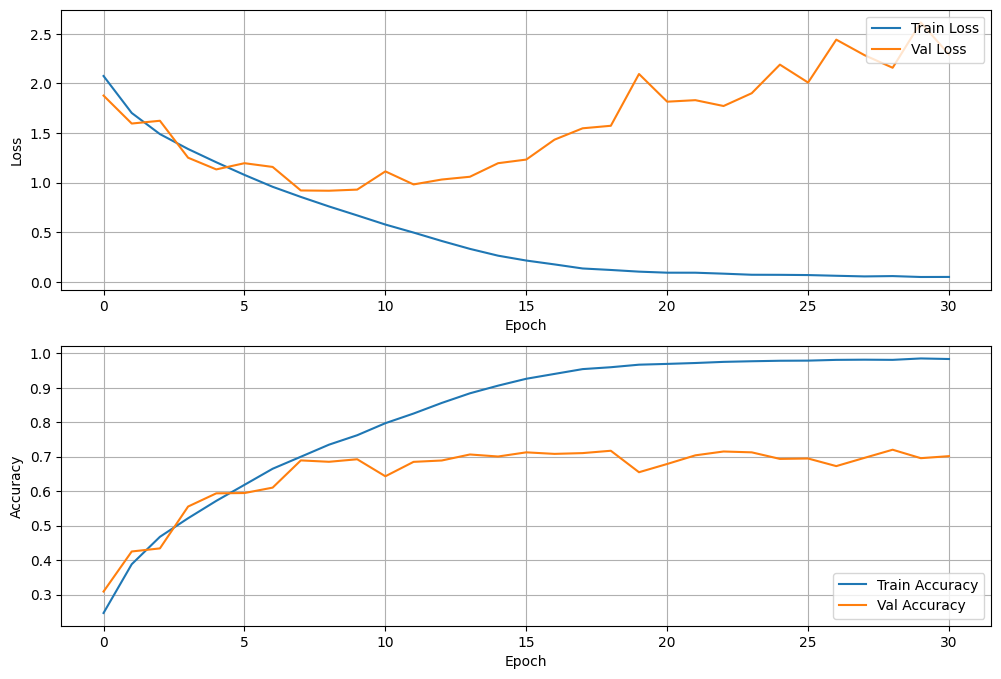

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'], loc='upper right')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Val Accuracy'], loc='lower right')
plt.grid(True);

The plots show that the model is **overfitting**! The validation loss increases while the training loss continues to decrease. Similarly, the validation accuracy decreases while the training accuracy approaches 100. This means the model learns how to model the training data well but does not generalize to unseen data well. One reason is that the model can fit the nuances of the training dataset, especially when the training dataset is small.

# 4. Adding **Dropout** to the Model

To help mitigate overfitting, we can employ one or more **regularization** strategies to help the model generalize better. Regularization techniques help to restrict the model's flexibility so that it doesn't overfit the training data. We will use **Dropout**, which randomly drops a percentage of neurons during the training process.

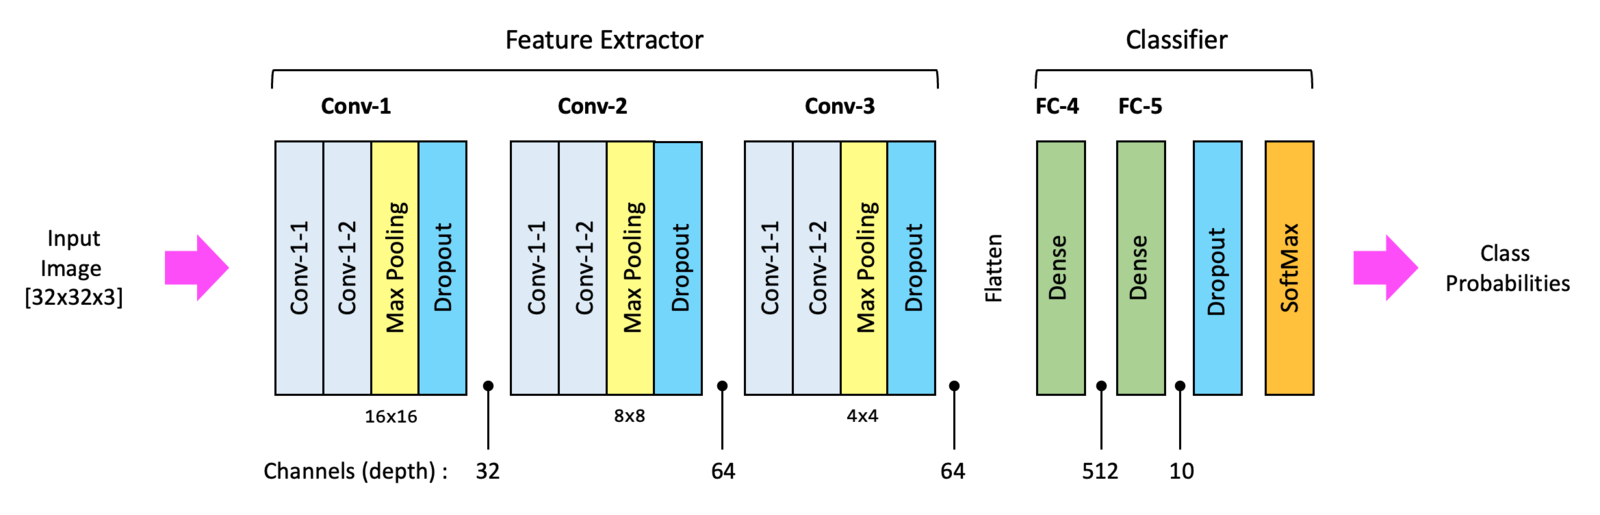

In [12]:
# build the model with Dropout
model_dropout = Sequential()

# Conv Block 1: 32 filters, max pooling 
model_dropout.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=img_size))
model_dropout.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout.add(Dropout(0.25)) # Dropout

# Conv Block 2: 64 filters, max pooling 
model_dropout.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_dropout.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout.add(Dropout(0.25)) # Dropout

# Conv Block 3: 64 filters, max pooling 
model_dropout.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_dropout.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout.add(Dropout(0.25)) # Dropout

# flatten the convolutional features
model_dropout.add(Flatten())
model_dropout.add(Dense(512, activation='relu'))
model_dropout.add(Dropout(0.5)) # Dropout
model_dropout.add(Dense(10, activation='softmax'))

In [13]:
model_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# compile the model
model_dropout.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"],)

In [15]:
# train the model
history = model_dropout.fit(X_train, y_train_onehot, batch_size=256, epochs=31, validation_split=0.3)

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 308ms/step - accuracy: 0.1379 - loss: 2.2724 - val_accuracy: 0.3019 - val_loss: 1.9556
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 309ms/step - accuracy: 0.3013 - loss: 1.9349 - val_accuracy: 0.3431 - val_loss: 1.8061
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 306ms/step - accuracy: 0.3848 - loss: 1.6903 - val_accuracy: 0.4641 - val_loss: 1.4465
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 306ms/step - accuracy: 0.4472 - loss: 1.5196 - val_accuracy: 0.5014 - val_loss: 1.3838
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 310ms/step - accuracy: 0.4933 - loss: 1.3975 - val_accuracy: 0.5593 - val_loss: 1.2258
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 306ms/step - accuracy: 0.5361 - loss: 1.2880 - val_accuracy: 0.5689 - val_loss: 1.1995
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 308ms/step - accuracy: 0.5637 - loss: 1.2151 - val_accuracy: 0.6118 - val_loss: 1.0967
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 307ms/step - accuracy: 0.6007 - loss: 1

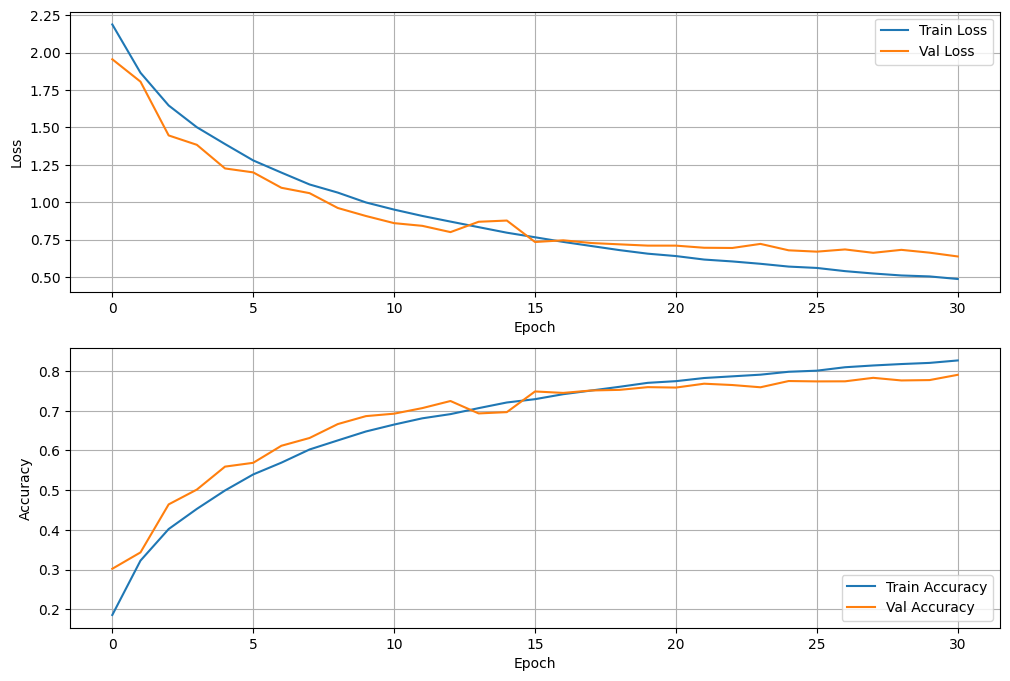

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'], loc='upper right')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Val Accuracy'], loc='lower right')
plt.grid(True);

The above plot shows that the training curves align closely with the validation curves. Notice that we achieve a higher validation accuracy than the baseline model that did not contain dropout.

# 5. Save and Load Models

In [17]:
# save the model
model_dropout.save('model_dropout.keras')

In [19]:
# load the model 
from tensorflow.keras import models
reloaded_model_dropout = models.load_model('model_dropout.keras')

# 6. Prediction and Model Evaluation

In [21]:
# evaluate the model on the test dataset
test_loss, test_acc = reloaded_model_dropout.evaluate(X_test, y_test_onehot, verbose=0)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

test loss: 0.6441153883934021
test accuracy: 0.7843000292778015


In [22]:
# make predictions on the test images
y_test_pred = reloaded_model_dropout.predict(X_test, verbose=0)
y_test_pred_label = np.argmax(y_test_pred, axis=1)

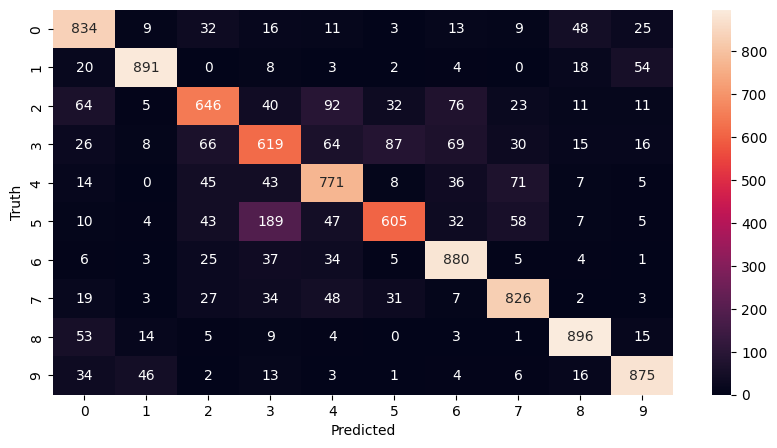

In [27]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_test_pred_label)

plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size':10})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()